# Xác Suất và Mô Phỏng

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from scipy.stats import binom
from scipy.stats import poisson
from scipy.stats import norm

## 1. Biến ngẫu nhiên rời rạc

Giả sử X là biến ngẫu nhiên rời rạc

a. Hãy cho biết ý nghĩa câu lệnh sau: `binom.pmf(4, 10, 0.6)`

b. Giả sử X có phân phối nhị thức `X ~ B(10, 0.6)`. Hãy tính các giá trị sau:  
$P(X \leq 5), P(X \le 5), P(X \ge 4), P(X = 5) $

c. Hãy cho biết ý nghĩa câu lệnh sau: `poisson.pmf(4, 3)`

d. Giả sử X có phân phối Poisson `X ~ P(3)`. Hãy tính các giá trị sau:  
$P(X \leq 5), P(X \le 5), P(X \ge 4), P(X = 5) $

In [6]:
# a. Trong trường hợp này, binom.pmf(4, 10, 0.6) sẽ trả về xác suất của việc có chính xác 4 thành công trong 10 thử
#  nghiệm độc lập, khi xác suất thành công trong mỗi thử nghiệm là 0.6.
print(binom.pmf(4, 10, 0.6))

0.11147673600000006


# 2. Tỷ lệ đậu

Một môn học X được tổ chức mỗi học kỳ có tỷ lệ thí sinh học qua môn trung bình là 80%, và mỗi học kỳ có 250 sinh viên đăng ký dự thi. Tính giá trị kỳ vọng và độ lệch chuẩn của số lượng thí sinh không vượt qua môn học?

In [7]:
n = 250
p = 0.2

#Giá trị kì vọng và độ lệch chuẩn của sinh viên không vượt qua
mean, var = binom.stats(n, p)
std = binom.std(n, p)

print(f'Giá trị kì vọng của sinh viên không vượt qua: {mean}')
print(f'Độ lệch chuẩn của sinh viên không vượt qua: {std}')

Giá trị kì vọng của sinh viên không vượt qua: 50.0
Độ lệch chuẩn của sinh viên không vượt qua: 6.324555320336759


## 3. Tổng đài

Một tổng đài trung bình trong một giờ nhận được 180 cuộc gọi một cách ngẫu nhiên. Nếu trong 5 phút có từ hơn 20 cuộc gọi trở lên, thì tổng đài sẽ quá tải và người gọi đến sẽ phải chờ đợi. Giả sử số cuộc gọi nhận được trong 5 phút của tổng đài có phân phối Poisson. Tính:

a. Xác suất nhận được nhiều hơn 19 cuộc gọi mỗi 5 phút.

b. Trong 5 phút tổng đài có thể nhận được nhiều nhất bao nhiêu cuộc gọi để xác suất các cuộc gọi đều được xử lý ít nhất là 99%

In [8]:
# 180 cuộc gọi mỗi giờ -> 5 phút có 180/12 = 15 cuộc gọi
mu = 15
# a. Xác xuất nhận được nhiều hơn 19 cuộc bằng 1 - xác xuất ít hơn hoặc bằng 19 cuộc
prob_a = 1 - poisson.cdf(19, mu)
print(f'Xác xuất nhận được nhiều hơn 19 cuộc: {prob_a}')


# b Trong 5 phút tổng đài 
# có thể nhận được nhiều nhất bao nhiêu cuộc gọi để xác suất các cuộc gọi đều được xử lý ít nhất là 99%
k = 0
while poisson.cdf(k, mu) < 0.99:
    k += 1
print(f'Số cuộc gọi nhiều nhất có thể nhận được để xác suất các cuộc gọi đều được xử lý ít nhất là 99%: {k}')

Xác xuất nhận được nhiều hơn 19 cuộc: 0.12478121503252504
Số cuộc gọi nhiều nhất có thể nhận được để xác suất các cuộc gọi đều được xử lý ít nhất là 99%: 25


## 4. Phân phối liên tục

a. Cho biết ý nghĩa của các câu lệnh sau:

- `norm.cdf(2)`

- `norm.cdf(2, 1, 1)`

- `norm.cdf(2, 1, 2)`

b. Cho biết kết quả của câu lệnh sau: `norm.ppf(norm.cdf(2))`

c. Tính các giá trị sau và vẽ hình minh họa cho các giá trị tính được:

- `norm.ppf(0.975)`

- `norm.ppf(0.975, 1, 1)`

- `norm.ppf(0.975, 1, 2)`

d. Giả sử biến ngẫu nhiên X có phân phối chuẩn với kỳ vọng là 24 và phương sai là 16. Hãy tính các giá trị sau:

- $P(X \leq 20)$
- $P(X \ge 29.5)$
- $P(X = 23.8)$

In [ ]:
# a. Các câu lệnh này đều sử dụng hàm `norm.cdf` từ thư viện scipy.stats, một hàm phân phối tích lũy của phân phối chuẩn:

# - `norm.cdf(2)`: Tính xác suất P(Z <= 2) với Z là một biến ngẫu nhiên có phân phối chuẩn chuẩn hóa (kỳ vọng 0, độ lệch chuẩn 1).
# - `norm.cdf(2, 1, 1)`: Tính xác suất P(X <= 2) với X là một biến ngẫu nhiên có phân phối chuẩn với kỳ vọng 1 và độ lệch chuẩn 1.
# - `norm.cdf(2, 1, 2)`: Tính xác suất P(X <= 2) với X là một biến ngẫu nhiên có phân phối chuẩn với kỳ vọng 1 và độ lệch chuẩn 2.

# b. `norm.ppf(norm.cdf(2))` sẽ trả về giá trị 2. Hàm `norm.ppf` là hàm ngược của `norm.cdf`, nên `norm.ppf(norm.cdf(x))` sẽ trả về x.

# c. Hàm `norm.ppf` trả về giá trị x sao cho P(Z <= x) = q với Z là một biến ngẫu nhiên có phân phối chuẩn chuẩn hóa. Đối với `norm.ppf(0.975)`, `norm.ppf(0.975, 1, 1)`, và `norm.ppf(0.975, 1, 2)`, chúng trả về giá trị x sao cho xác suất P(Z <= x) = 0.975 với Z có phân phối chuẩn chuẩn hóa, phân phối chuẩn với kỳ vọng 1 và độ lệch chuẩn 1, và phân phối chuẩn với kỳ vọng 1 và độ lệch chuẩn 2, tương ứng.

# d. Đối với biến ngẫu nhiên X có phân phối chuẩn với kỳ vọng 24 và phương sai 16 (độ lệch chuẩn 4), chúng ta có thể sử dụng hàm `norm.cdf` để tính các xác suất:

# - $P(X \leq 20)$: `norm.cdf(20, 24, 4)`
# - $P(X \ge 29.5)$: `1 - norm.cdf(29.5, 24, 4)`
# - $P(X = 23.8)$: Trong phân phối liên tục, xác suất tại một điểm cụ thể luôn bằng 0.

## 5. Độ dài chi tiết máy

Một công ty sản xuất làm ra các chi tiết máy với độ dài các chi tiết có phân phối chuẩn với kỳ vọng là 3000 mm và độ lệch chuẩn là 3 mm. Yêu cầu cho các chi tiết máy này là phải có chiều dài từ 2993 mm đến 3007 mm. Tính tỷ lệ sản phẩm lỗi của công ty

In [10]:
mu = 3000
sigma = 3

# Tính xác suất sản phẩm không lỗi
prob_not_defective = norm.cdf(3007, mu, sigma) - norm.cdf(2993, mu, sigma)

# Tính tỷ lệ sản phẩm lỗi
prob_defective = 1 - prob_not_defective

print(f'Tỷ lệ sản phẩm lỗi: {prob_defective}')

Tỷ lệ sản phẩm lỗi: 0.01963065725729063


## 6. Mô phỏng phân phối Chuẩn

Giả sử điểm thi TOEIC là một biến ngẫu nhiên có phân phối chuẩn với kỳ vọng là 500, độ lệch chuẩn là 8. Bạn hãy:

a. Mô phỏng bằng cách phát sinh ngẫu nhiên điểm thi TOIEC của một nhóm gồm 50 người.

b. Tính điểm trung bình và độ lệch chuẩn về điểm của nhóm.

c. Tìm miền giá trị, và miền phân vị (IQR) của nhóm

d. Cho biết tỷ lệ đạt trên 450 điểm của nhóm. 

e. Vẽ đồ thị histogram của nhóm và so sánh với đồ thị hàm mật độ của phân phối chuẩn với kỳ vọng là 500 và độ lệch chuẩn là 8.

f. Thay vì mô phỏng 50 người, hãy mô phỏng nhóm với 100 người thi. Bạn có nhận xét gì?

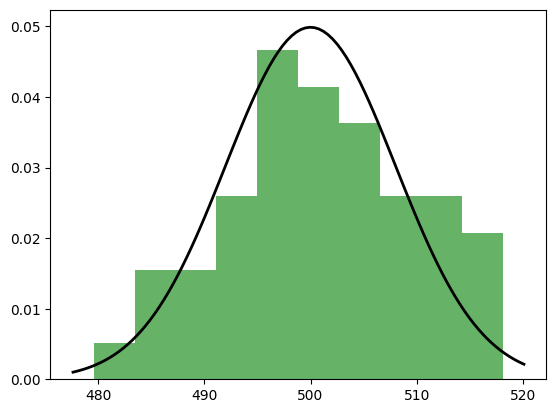

In [11]:
# a. Mô phỏng điểm thi TOEIC
np.random.seed(0)
scores = np.random.normal(500, 8, 50)

# b. Tính điểm trung bình và độ lệch chuẩn
mean_score = np.mean(scores)
std_dev = np.std(scores)

# c. Tìm miền giá trị, và miền phân vị (IQR)
range_scores = (np.min(scores), np.max(scores))
iqr = np.percentile(scores, 75) - np.percentile(scores, 25)

# d. Tỷ lệ đạt trên 450 điểm
pass_rate = np.sum(scores > 450) / len(scores)

# e. Vẽ đồ thị histogram và so sánh với đồ thị hàm mật độ
plt.hist(scores, bins=10, density=True, alpha=0.6, color='g')
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, 500, 8)
plt.plot(x, p, 'k', linewidth=2)
plt.show()

# f. Mô phỏng nhóm với 100 người thi
scores_100 = np.random.normal(500, 8, 100)
mean_score_100 = np.mean(scores_100)
std_dev_100 = np.std(scores_100)